In [141]:
import yaml
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ray import tune

In [142]:
# # Read ray tune experiment results
# experiment_name = "umap_hyperparameters_on_kuhar.standartized_balanced_starting_with_30.60.90...300"
# path = os.path.join("../ray_results", experiment_name)
# restored_tuner = tune.Tuner.restore(experiment_name, trainable=None)
# result_grid = restored_tuner.get_results()
# results_df = pd.DataFrame(result_grid)
# results_df

In [143]:
data = pd.read_csv('umap_hyperparameters_on_kuhar.standartized_balanced_starting_with_30.60.90...300/data.csv')

# data = pd.read_csv('umap_hyperparameters_on_kuhar.standartized_balanced_starting_with_200/results/data.csv')

data

,Unnamed: 0,score,time_this_iter_s,done,training_iteration,trial_id,date,timestamp,time_total_s,pid,hostname,node_ip,time_since_restore,iterations_since_restore,config/umap_mdist,config/umap_ncomp,config/umap_neigh,config/umap_spread,logdir
0,0,0.380282,59.882924,False,1,7c409ffc,2023-08-30_18-10-49,1693419049,59.882924,3052763,84233402a856,172.17.0.8,59.882924,1,0.100000,30,15,1,/home/darlinne.soto/ray_results/umap_hyperpara...
1,1,0.373239,77.324641,True,1,fcc4c615,2023-08-30_18-11-39,1693419099,77.324641,3056976,84233402a856,172.17.0.8,77.324641,1,0.100000,60,15,1,/home/darlinne.soto/ray_results/umap_hyperpara...
2,2,0.373239,104.379961,True,1,1340c4f9,2023-08-30_18-12-26,1693419146,104.379961,3057224,84233402a856,172.17.0.8,104.379961,1,0.100000,90,15,1,/home/darlinne.soto/ray_results/umap_hyperpara...
3,3,0.373239,104.246835,True,1,23722d25,2023-08-30_18-12-33,1693419153,104.246835,3052763,84233402a856,172.17.0.8,104.246835,1,0.100000,120,15,1,/home/darlinne.soto/ray_results/umap_hyperpara...
4,4,0.366197,142.819954,True,1,58f711e4,2023-08-30_18-13-41,1693419221,142.819954,3057718,84233402a856,172.17.0.8,142.819954,1,0.100000,150,15,1,/home/darlinne.soto/ray_results/umap_hyperpara...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5637,5637,0.373239,144.273574,True,1,16098309,2023-08-31_04-41-32,1693456892,144.273574,4151516,84233402a856,172.17.0.8,144.273574,1,0.234533,257,11,3,/home/darlinne.soto/ray_results/umap_hyperpara...
5638,5638,0.392019,120.919033,False,1,98040752,2023-08-31_04-41-25,1693456885,120.919033,3052763,84233402a856,172.17.0.8,120.919033,1,0.341979,289,6,3,/home/darlinne.soto/ray_results/umap_hyperpara...
5639,5639,0.271831,70.170300,True,1,88b6a5c1,2023-08-31_04-40-45,1693456845,70.170300,3090854,84233402a856,172.17.0.8,70.170300,1,0.217320,267,2,3,/home/darlinne.soto/ray_results/umap_hyperpara...
5640,5640,0.431925,111.358686,False,1,6a0a8c83,2023-08-31_04-41-37,1693456897,111.358686,3066121,84233402a856,172.17.0.8,111.358686,1,0.235812,273,5,3,/home/darlinne.soto/ray_results/umap_hyperpara...


In [144]:
# data = pd.read_csv('umap_hyperparameters_on_kuhar.standartized_balanced_starting_with_200/results/data.csv')
# data

<Axes: >

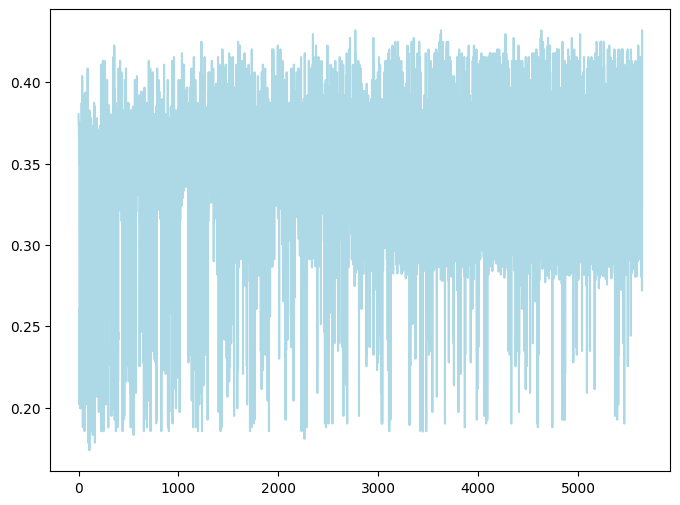

In [155]:
data['score'].plot(color='lightblue', figsize=(8, 6))

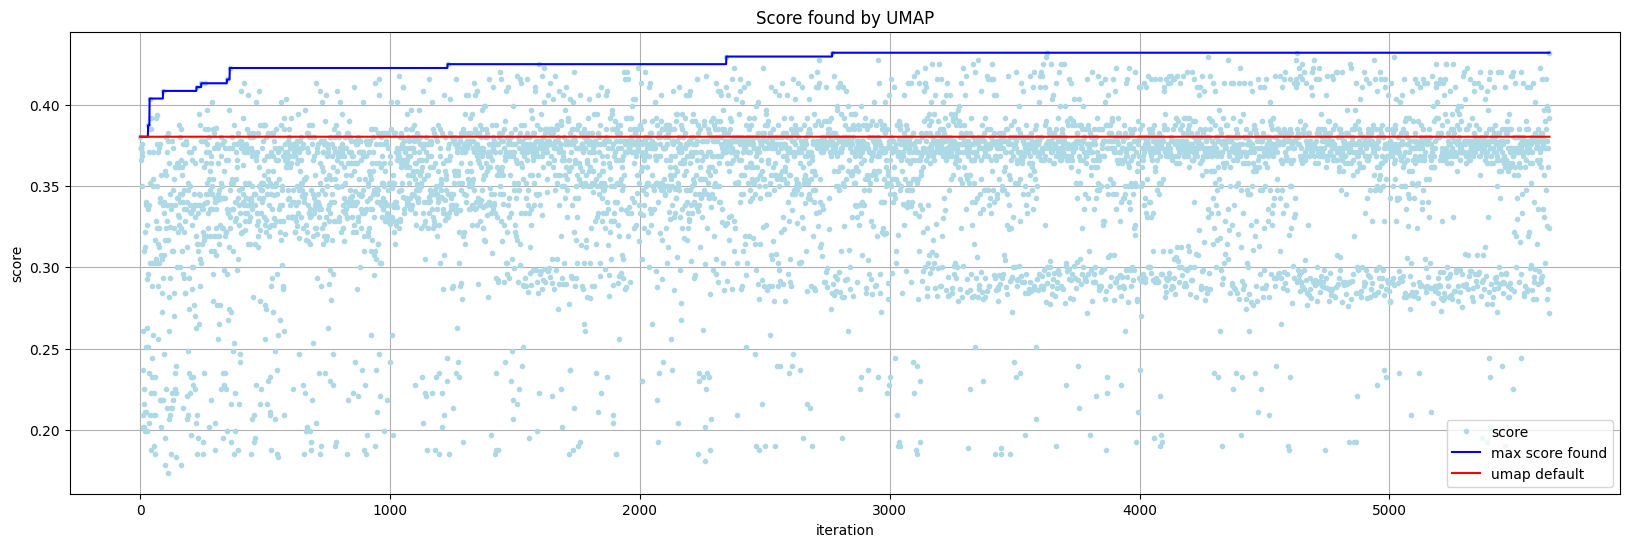

In [162]:
score1 = data.loc[0,'score']
data['score'].plot(color='lightblue', figsize=(20, 6), style='.')
data.cummax()['score'].plot(legend=True, label='max score found', color='blue')
plt.plot(list(range(len(data))), [score1]*len(data), color='red', label='umap default')
plt.legend()
plt.xlabel('iteration')
plt.ylabel('score')
plt.title('Score found by UMAP')
plt.grid()
# plt.show()


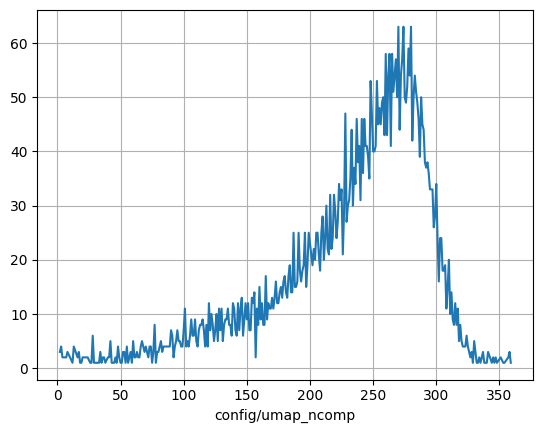

In [146]:
data.groupby('config/umap_ncomp').count()['score'].plot()
plt.grid()

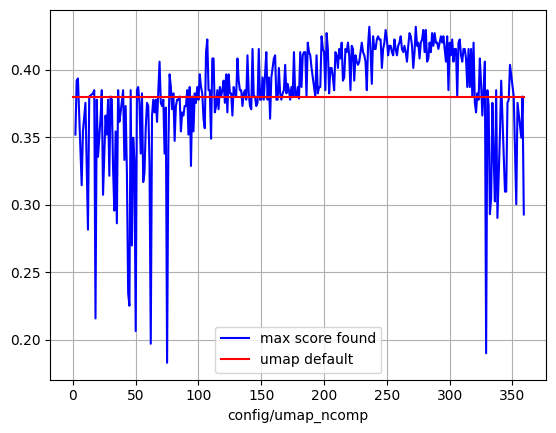

In [147]:
data.groupby('config/umap_ncomp').max()['score'].plot(legend=True, label='max score found', color='blue')
plt.plot(list(range(360)), [score1]*360, color='red', label='umap default')
plt.legend()
plt.grid()

<Axes: title={'center': 'score'}, xlabel='config/umap_spread'>

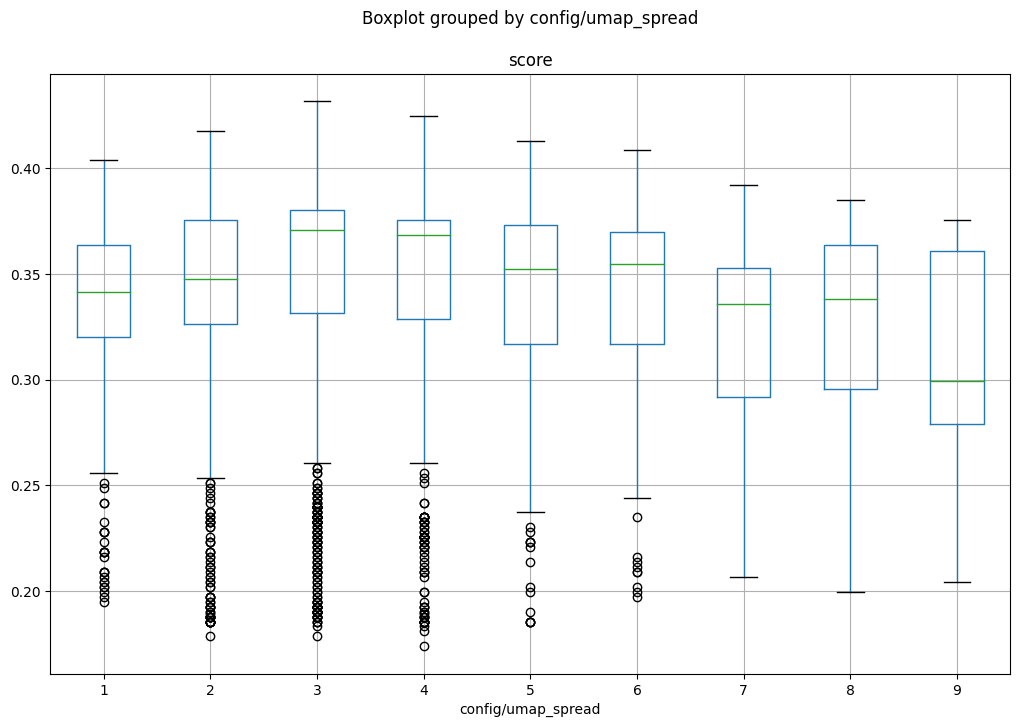

In [148]:
# data.groupby('config/umap_ncomp').boxplot(column='score')

# data.groupby('config/umap_spread').boxplot(column='score', by='config/umap_spread')

data.boxplot(column='score', by='config/umap_spread', figsize=(12,8))
# category = pd.cut(data['config/umap_ncomp'], bins=5, labels=['0.0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0'])
# print(category)
# data.boxplot(column='score', by=category, figsize=(12,8))
# plt.boxplot(data['score'])
# data.boxplot(column='score', by='config/umap_ncomp', figsize=(40,10))

| Trial name            | status     | loc               |   umap_mdist |   umap_neigh |   umap_spread |   iter |   total time (s) |    score |
| objective_7f36f_00006 | TERMINATED | 172.17.0.12:15622 |    0.926511  |           36 |            27 |      1 |          25.2358 | 0.416667 |

In [149]:
# | Trial name            | status     | loc               |   umap_mdist |   umap_neigh |   umap_spread |   iter |   total time (s) |    score |
# | objective_7f36f_00006 | TERMINATED | 172.17.0.12:15622 |    0.926511  |           36 |            27 |      1 |          25.2358 | 0.416667 |

In [150]:
# fig, ax = plt.subplots(1, 1, figsize=(10, 8))
# dims, scores, max_scores = read_and_create_graph("results_kuhar_std0.01_top5/results_for_kuhar_all_dim.yaml")
# ax.plot(dims, scores, label='Accuracy', linewidth=1.0, color='gray')
# ax.plot(dims, max_scores, label='Max Accuracy', linewidth=1.5, color='blue', linestyle='--')
# ax.grid()
# ax.set_title('Dimensionality vs. Accuracy - KH standartized_balanced')
# ax.set_xlabel('Dimensionality')
# ax.set_ylabel('Accuracy')
# ax.legend()
# ax.set_ylim(0.0, 1.0)